In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import re
from matplotlib import rcParams
import random as ra

In [3]:
rcParams['figure.figsize'] = (14, 10)

In [4]:
demog_df = pd.read_csv('demographics.csv')

In [5]:
index_df = pd.read_csv('index.csv')

## Region itentification

In [6]:
# index_df.query('country_code == "IT" & subregion1_name == "Lombardy"')
index_df.query('subregion2_name == "Bergamo"')

,key,wikidata,datacommons,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,3166-1-alpha-2,3166-1-alpha-3,aggregation_level
12393,IT_25_BG,Q16137,iso/IT-BG,IT,Italy,25,Lombardy,BG,Bergamo,NaN,NaN,IT,ITA,2


In [7]:
index_df.query('subregion1_name == "Lombardy" & aggregation_level == 1')

,key,wikidata,datacommons,country_code,country_name,subregion1_code,subregion1_name,subregion2_code,subregion2_name,locality_code,locality_name,3166-1-alpha-2,3166-1-alpha-3,aggregation_level
12392,IT_25,Q1210,nuts/ITC4,IT,Italy,25,Lombardy,NaN,NaN,NaN,NaN,IT,ITA,1


## Age distribution

In [8]:
demog_df.query('key == "IT_25_BG"')

,key,population,population_male,population_female,rural_population,urban_population,largest_city_population,clustered_population,population_density,human_development_index,...,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_89,population_age_90_99,population_age_80_and_older
10164,IT_25_BG,1109933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
lombardy_demog_df = demog_df.query('key == "IT_25"')
lombardy_demog_df

,key,population,population_male,population_female,rural_population,urban_population,largest_city_population,clustered_population,population_density,human_development_index,...,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_89,population_age_90_99,population_age_80_and_older
10163,IT_25,10060574.0,4924451.0,5136123.0,NaN,NaN,NaN,NaN,436.0,NaN,...,961237.0,982354.0,1187594.0,1591034.0,1566175.0,1182159.0,994236.0,617140.0,154285.0,711371.0


In [10]:
population_cols = demog_df.columns.where(demog_df.columns.str.startswith('population_age')).dropna()
lombardy_demog_df[population_cols]

,population_age_00_09,population_age_10_19,population_age_20_29,population_age_30_39,population_age_40_49,population_age_50_59,population_age_60_69,population_age_70_79,population_age_80_89,population_age_90_99,population_age_80_and_older
10163,884414.0,961237.0,982354.0,1187594.0,1591034.0,1566175.0,1182159.0,994236.0,617140.0,154285.0,711371.0


In [35]:
def bounds_from_col_name(col_name):
    groups = re.match(r'population_age_(\d{2})_(\d{2})?', col_name).groups()
    lo, up = (int(groups[0]), None) if groups[1] is None else (int(groups[0]), int(groups[1]))
    return lo, up
bounds_from_col_name('population_age_00_09'), bounds_from_col_name('population_age_80_and_older')

((0, 9), (80, None))

In [87]:
lombardy_demog = lombardy_demog_df[population_cols].to_dict(orient='list')
lombardy_demog = [(bounds_from_col_name(k), int(v[0])) for k, v in lombardy_demog.items()]
lombardy_demog = [((k[0], k[1]), v) for k, v in lombardy_demog]
lombardy_demog
lombardy_demog_dist_df = pd.DataFrame(data=lombardy_demog, columns=['age', 'count'], dtype=pd.Int64Dtype)
lombardy_demog_dist_df = lombardy_demog_dist_df[(lombardy_demog_dist_df['age'] != (80, 89)) & (lombardy_demog_dist_df['age'] != (90, 99))]
lombardy_demog_dist_df = lombardy_demog_dist_df.set_index('age')
lombardy_demog_dist_df

,count
age,
"(0, 9)",884414
"(10, 19)",961237
"(20, 29)",982354
"(30, 39)",1187594
"(40, 49)",1591034
"(50, 59)",1566175
"(60, 69)",1182159
"(70, 79)",994236
"(80, None)",711371


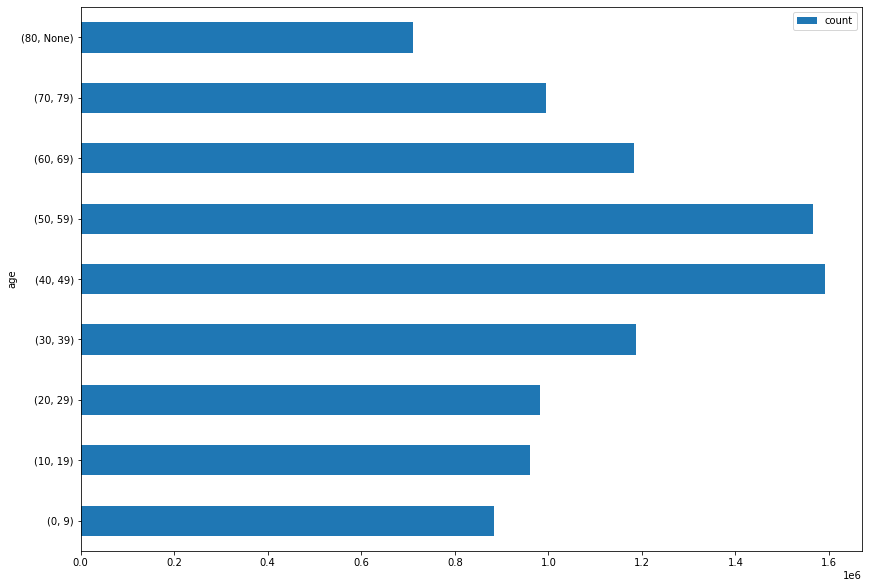

In [88]:
_ = lombardy_demog_dist_df.plot.barh()

In [89]:
lombardy_population = lombardy_demog_dist_df['count'].sum()
lombardy_population # 10060574	

10060574

In [90]:
lombardy_demog_dist_df['p'] = lombardy_demog_dist_df['count'] / lombardy_population
lombardy_demog_dist_df

,count,p
age,,
"(0, 9)",884414,0.0879089
"(10, 19)",961237,0.0955449
"(20, 29)",982354,0.0976439
"(30, 39)",1187594,0.118044
"(40, 49)",1591034,0.158145
"(50, 59)",1566175,0.155675
"(60, 69)",1182159,0.117504
"(70, 79)",994236,0.098825
"(80, None)",711371,0.0707088


In [138]:
probabilities = list(lombardy_demog_dist_df['p'].values)
probabilities, len(probabilities)

([0.08790890062535199,
  0.09554494604383408,
  0.09764393164843278,
  0.11804435810521348,
  0.1581454497526682,
  0.15567451717963607,
  0.11750413048003026,
  0.09882497758080205,
  0.0707087885840311],
 9)

In [225]:
def get_random_ages(n):
    probabilities = [
        0.08790890062535199,
        0.09554494604383408,
        0.09764393164843278,
        0.11804435810521348,
        0.1581454497526682,
        0.15567451717963607,
        0.11750413048003026,
        0.09882497758080205,
        0.0707087885840311
    ]
    lower = ra.choices(range(9), weights=probabilities, k=n)
    lower = [l * 10 for l in lower]
    upper = [l + (9 if l != 80 else 19) for l in lower]
    lu = zip(lower, upper)
    return [ra.randint(l, u) for l, u in lu]

In [253]:
def get_random_ages(n):
    probabilities = [
        0.08790890062535199,
        0.09554494604383408,
        0.09764393164843278,
        0.11804435810521348,
        0.1581454497526682,
        0.15567451717963607,
        0.11750413048003026,
        0.09882497758080205,
        0.0707087885840311
    ]
    
    ages = [a for i, p in enumerate(probabilities) for a in list(range(i * 10, i * 10 + 10))]
    weights = [p for i, p in enumerate(probabilities) for a in list(range(i * 10, i * 10 + 10))]
    
    return ra.choices(population=ages, weights=weights, k=n)
    
#     lower = ra.choices(range(9), weights=probabilities, k=n)
#     lower = [l * 10 for l in lower]
#     upper = [l + (9 if l != 80 else 19) for l in lower]
#     lu = zip(lower, upper)
#     return [ra.randint(l, u) for l, u in lu]

In [256]:
%%time
ages = get_random_ages(int(10e6))

Wall time: 4.96 s


In [260]:
ages_df = pd.DataFrame(data=ages, columns=['age'])
ages_df

,age
0,6
1,25
2,63
3,40
4,50
...,...
9999995,87
9999996,58
9999997,9
9999998,48


<AxesSubplot:ylabel='age'>

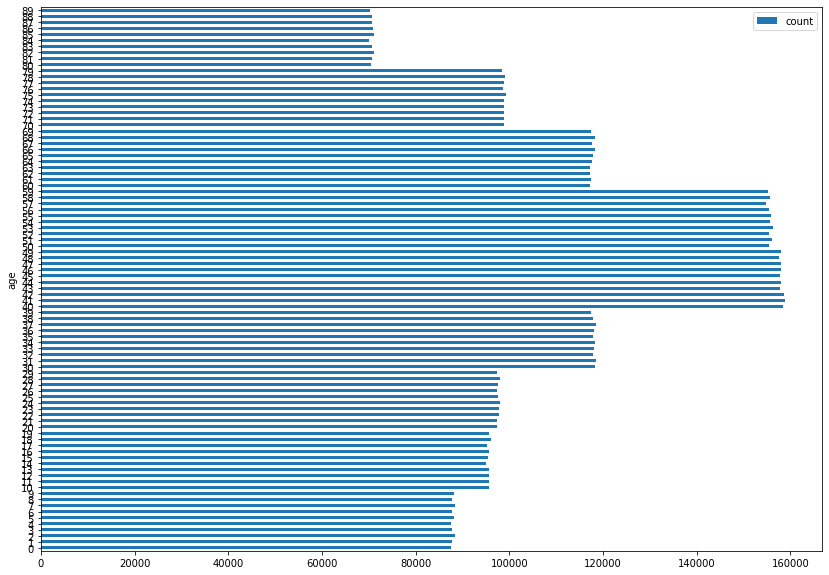

In [282]:
agg_ages_df = ages_df.groupby('age').size().reset_index()
agg_ages_df.columns = ['age', 'count']
agg_ages_df.plot.barh(x='age', y='count')